# SEOUL BIKE SHARING DEMAND

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se obtiene el Data Set de <b>South Korea Public Holidays</b> presente en la plataforma <b>UCI Machine Learning Repository</b> acerca del recuento de las bicicletas públicas alquiladas en cada hora en el sistema de alquiler de bicicletas de Seúl con la datos meteorológicos correspondientes e información sobre las vacaciones. Según la documentación presenten el repositorio, se indica que se encuentran 8070 instancias o datos y 14 atributos diferentes. Con el cual  se cuenta con problema de regresión que tiene como objetivo predecir el número de bicicletas necesarias en cada hora para el suministro estable de bicicletas de alquiler.
  </font>
<p>

### SE IMPORTAN LAS LIBRERIAS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se importan las librerias de <b>pandas</b>, para cargar el Data Set en formato .csv, <b>numpy</b>, para la manipulación de arreglos, <b>matplotlib.pyplot</b>, para realizar graficas y <b>seaborn</b>, para la obtención de herramientas como pairplot y heatmap para el analisis de la correlación entre los datos.
  </font>
<p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### SE CARGAN LOS DATOS DEL CSV

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se cargan los datos del archivo .csv, en el cual se indica la ubicación y el cp1252, debido al tipo de caracteres presentes en el archivo.
  </font>
<p>

In [ ]:
data = pd.read_csv('/content/SeoulBikeData.csv',encoding='cp1252')
print(data.shape)
data.head(10)

(8760, 14)


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   
5  01/12/2017                100     5             -6.4           37   
6  01/12/2017                181     6             -6.6           35   
7  01/12/2017                460     7             -7.4           38   
8  01/12/2017                930     8             -7.6           37   
9  01/12/2017                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Mediante el metodo describe, se obtienen información estadistica como la cantidad de datos, el promedio, el valor mínimo, entre otros por cada uno de los atributos que lo permiten.
  </font>
<p>

In [ ]:
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se modfica el nombre de las columnas, de forma que sea más facil acceder a cada una de ellas, es decir, eliminando aspectos como su unidad y las mayusculas presentes.
  </font>
<p>

In [ ]:
data.columns = ['date','rented bike','hour','temperature','humidity','wind speed','visibility','dew point temperature','solar radiation','rainfall','snowfall', 'seasons',	'holiday',	'functioning day']
data.head(10)

date  rented bike  hour  temperature  humidity  wind speed  \
0  01/12/2017          254     0         -5.2        37         2.2   
1  01/12/2017          204     1         -5.5        38         0.8   
2  01/12/2017          173     2         -6.0        39         1.0   
3  01/12/2017          107     3         -6.2        40         0.9   
4  01/12/2017           78     4         -6.0        36         2.3   
5  01/12/2017          100     5         -6.4        37         1.5   
6  01/12/2017          181     6         -6.6        35         1.3   
7  01/12/2017          460     7         -7.4        38         0.9   
8  01/12/2017          930     8         -7.6        37         1.1   
9  01/12/2017          490     9         -6.5        27         0.5   

   visibility  dew point temperature  solar radiation  rainfall  snowfall  \
0        2000                  -17.6             0.00       0.0       0.0   
1        2000                  -17.6             0.00       0.0       0.0   
2        2000                  -17.7             0.00       0.0       0.0   
3        2000                  -17.6             0.00       0.0       0.0   
4        2000                  -18.6             0.00       0.0       0.0   
5        2000                  -18.7             0.00       0.0       0.0   
6        2000                  -19.5             0.00       0.0       0.0   
7        2000                  -19.3             0.00       0.0       0.0   
8        2000                  -19.8             0.01       0.0       0.0   
9        1928                  -22.4             0.23       0.0       0.0   

  seasons     holiday functioning day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes  
5  Winter  No Holiday             Yes  
6  Winter  No Holiday             Yes  
7  Winter  No Holiday             Yes  
8  Winter  No Holiday             Yes  
9  Winter  No Holiday             Yes

### SE VERIFICA SI EXISTEN VALORES NULOS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se verifica si existen o no, datos nulos y cuantos. Del cual se obtiene que <b>no existen datos nulos</b> en ninguno de los atributos.
  </font>
<p>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented bike            8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew point temperature  8760 non-null   float64
 8   solar radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
data.isnull().sum()

date                     0
rented bike              0
hour                     0
temperature              0
humidity                 0
wind speed               0
visibility               0
dew point temperature    0
solar radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning day          0
dtype: int64

### SE ELIMINAN LOS DATOS INNECESARIOS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Inicialmente, se <b>eliminan</b> las varibles de tipo <b>Date</b> y se <b>revisan</b> los datos de tipo <b>String</b>, al realizarlo se obtiene que los datos de <b>Holiday</b> (Holiday:8465 y No Holiday:295) y <b>Functiong Day</b> (Yes:8328 y No:432), presentan la mayoria de sus datos en un unico valor, a diferencia de <b>Season</b> (Winter: 2160, Spring: 2184, Summer: 2208 y Autumn: 2184) en el cual sus datos se encuentran distribuidos de manera uniforme, razón por la cual se les asigna un entero de 0 a 3, además de ello, se hace uso del metodo .to_numeric() de pandas para convertir de objeto a numero la respectiva columna. Posteriormente, al graficar los histogramas se observa que los atributos de <b>Rainfall</b> (8232 datos en 0.0) y <b>Snowfall</b> (8317 datos en 0.0) presenta la mayoria de sus datos en 0, por lo cual se decide eliminarlos de los datos.
  </font>
</p>
<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Season: Winter: 0, Spring: 1, Summer: 2, Autunum: 3
  </font>
</p>

In [ ]:
data = data.drop(['date'], axis=1)

In [ ]:
print(pd.value_counts(np.array(data['functioning day'])))
print(" ")
print(pd.value_counts(np.array(data['holiday'])))
print(" ")
print(pd.value_counts(np.array(data['seasons'])))

Yes    8465
No      295
dtype: int64
 
No Holiday    8328
Holiday        432
dtype: int64
 
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
dtype: int64


In [ ]:
data['seasons'][data['seasons'] == 'Winter'] = 0
data['seasons'][data['seasons'] == 'Spring'] = 1
data['seasons'][data['seasons'] == 'Summer'] = 2
data['seasons'][data['seasons'] == 'Autumn'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
data['seasons'] = pd.to_numeric(data['seasons'])
print(data.dtypes)

rented bike                int64
hour                       int64
temperature              float64
humidity                   int64
wind speed               float64
visibility                 int64
dew point temperature    float64
solar radiation          float64
rainfall                 float64
snowfall                 float64
seasons                    int64
holiday                   object
functioning day           object
dtype: object


In [ ]:
data = data.drop(['holiday','functioning day'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94fcaf0ad0>,
      dtype=object)

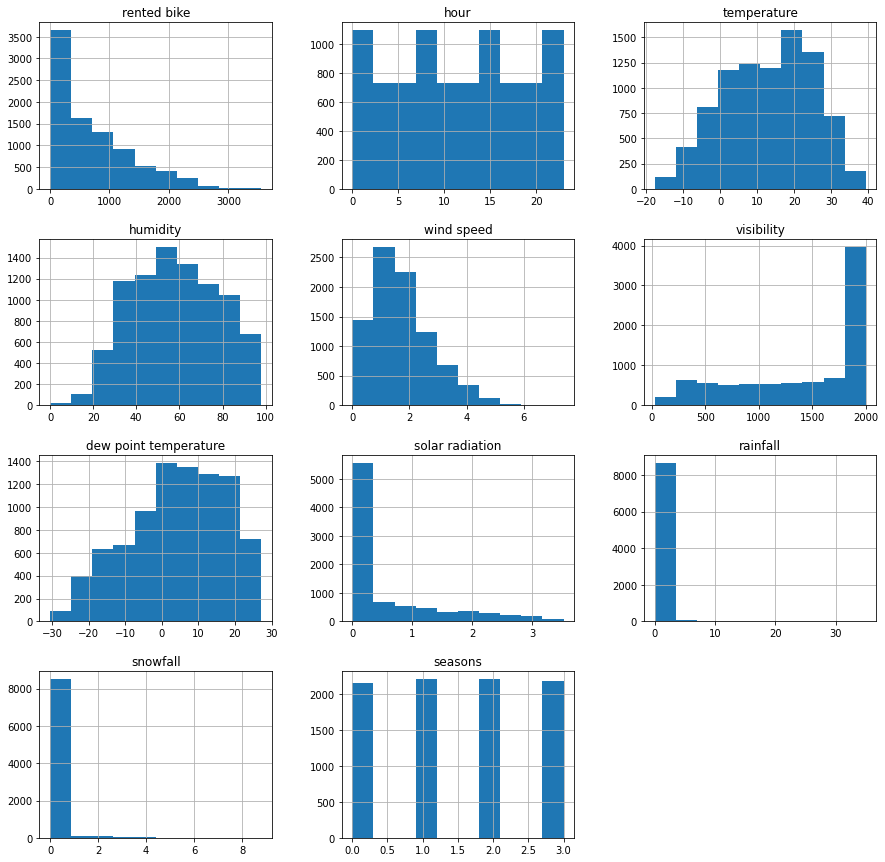

In [ ]:
data.hist(figsize=(15,15))

In [ ]:
count = np.count_nonzero(data['rainfall']==0.0)
print('rainfall = 0 ->', count)
count = np.count_nonzero(data['snowfall']==0.0)
print('snowfall = 0 ->', count)

rainfall = 0 -> 8232
snowfall = 0 -> 8317


In [ ]:
data = data.drop(['rainfall', 'snowfall'], axis=1)

### SE NORMALIZAN LOS DATOS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se <b>normalizan</b> los datos entre <b>-1 y 1</b>, con el fin de tener una mejor distribución.
  </font>
</p>

In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max = np.max(data).values
min = np.min(data).values
data2 = normalizar(data,max,min,1,-1)
data2.head(10)

rented bike      hour  temperature  humidity  wind speed  visibility  \
0    -0.857143 -1.000000    -0.559441 -0.244898   -0.405405    1.000000   
1    -0.885264 -0.913043    -0.569930 -0.224490   -0.783784    1.000000   
2    -0.902700 -0.826087    -0.587413 -0.204082   -0.729730    1.000000   
3    -0.939820 -0.739130    -0.594406 -0.183673   -0.756757    1.000000   
4    -0.956130 -0.652174    -0.587413 -0.265306   -0.378378    1.000000   
5    -0.943757 -0.565217    -0.601399 -0.244898   -0.594595    1.000000   
6    -0.898200 -0.478261    -0.608392 -0.285714   -0.648649    1.000000   
7    -0.741282 -0.391304    -0.636364 -0.224490   -0.756757    1.000000   
8    -0.476940 -0.304348    -0.643357 -0.244898   -0.702703    1.000000   
9    -0.724409 -0.217391    -0.604895 -0.448980   -0.864865    0.927015   

   dew point temperature  solar radiation  seasons  
0              -0.550173        -1.000000     -1.0  
1              -0.550173        -1.000000     -1.0  
2              -0.553633        -1.000000     -1.0  
3              -0.550173        -1.000000     -1.0  
4              -0.584775        -1.000000     -1.0  
5              -0.588235        -1.000000     -1.0  
6              -0.615917        -1.000000     -1.0  
7              -0.608997        -1.000000     -1.0  
8              -0.626298        -0.994318     -1.0  
9              -0.716263        -0.869318     -1.0

### SE ANLALIZA LA CORRELACION DE ATRIBUTOS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Mediante las herramientas de <b>seaborn</b> se realizan las siguientes graficas, de cada una de los atributos del dataset con respecto a cada uno de ellos mimos, permitiendo analizar la correlación entre los atributos y los atributos y entre los atributos y la salida. Por ultimo, se calculo los factores de correlación de cada una de las relaciones y se observan en un mapa de calor en el cual se puede observar la correlacion directa entre la temperatura, la hora y la cantidad de bicicletas rentadas, ademas, se resalta que los atributos relacionados con la temperatura, guardan una correlacion entre ellos como era de esperarse, lo cual no es del todo positivo puesto que se deseada que las entradas sean diferentes entre si.
  </font>
</p>

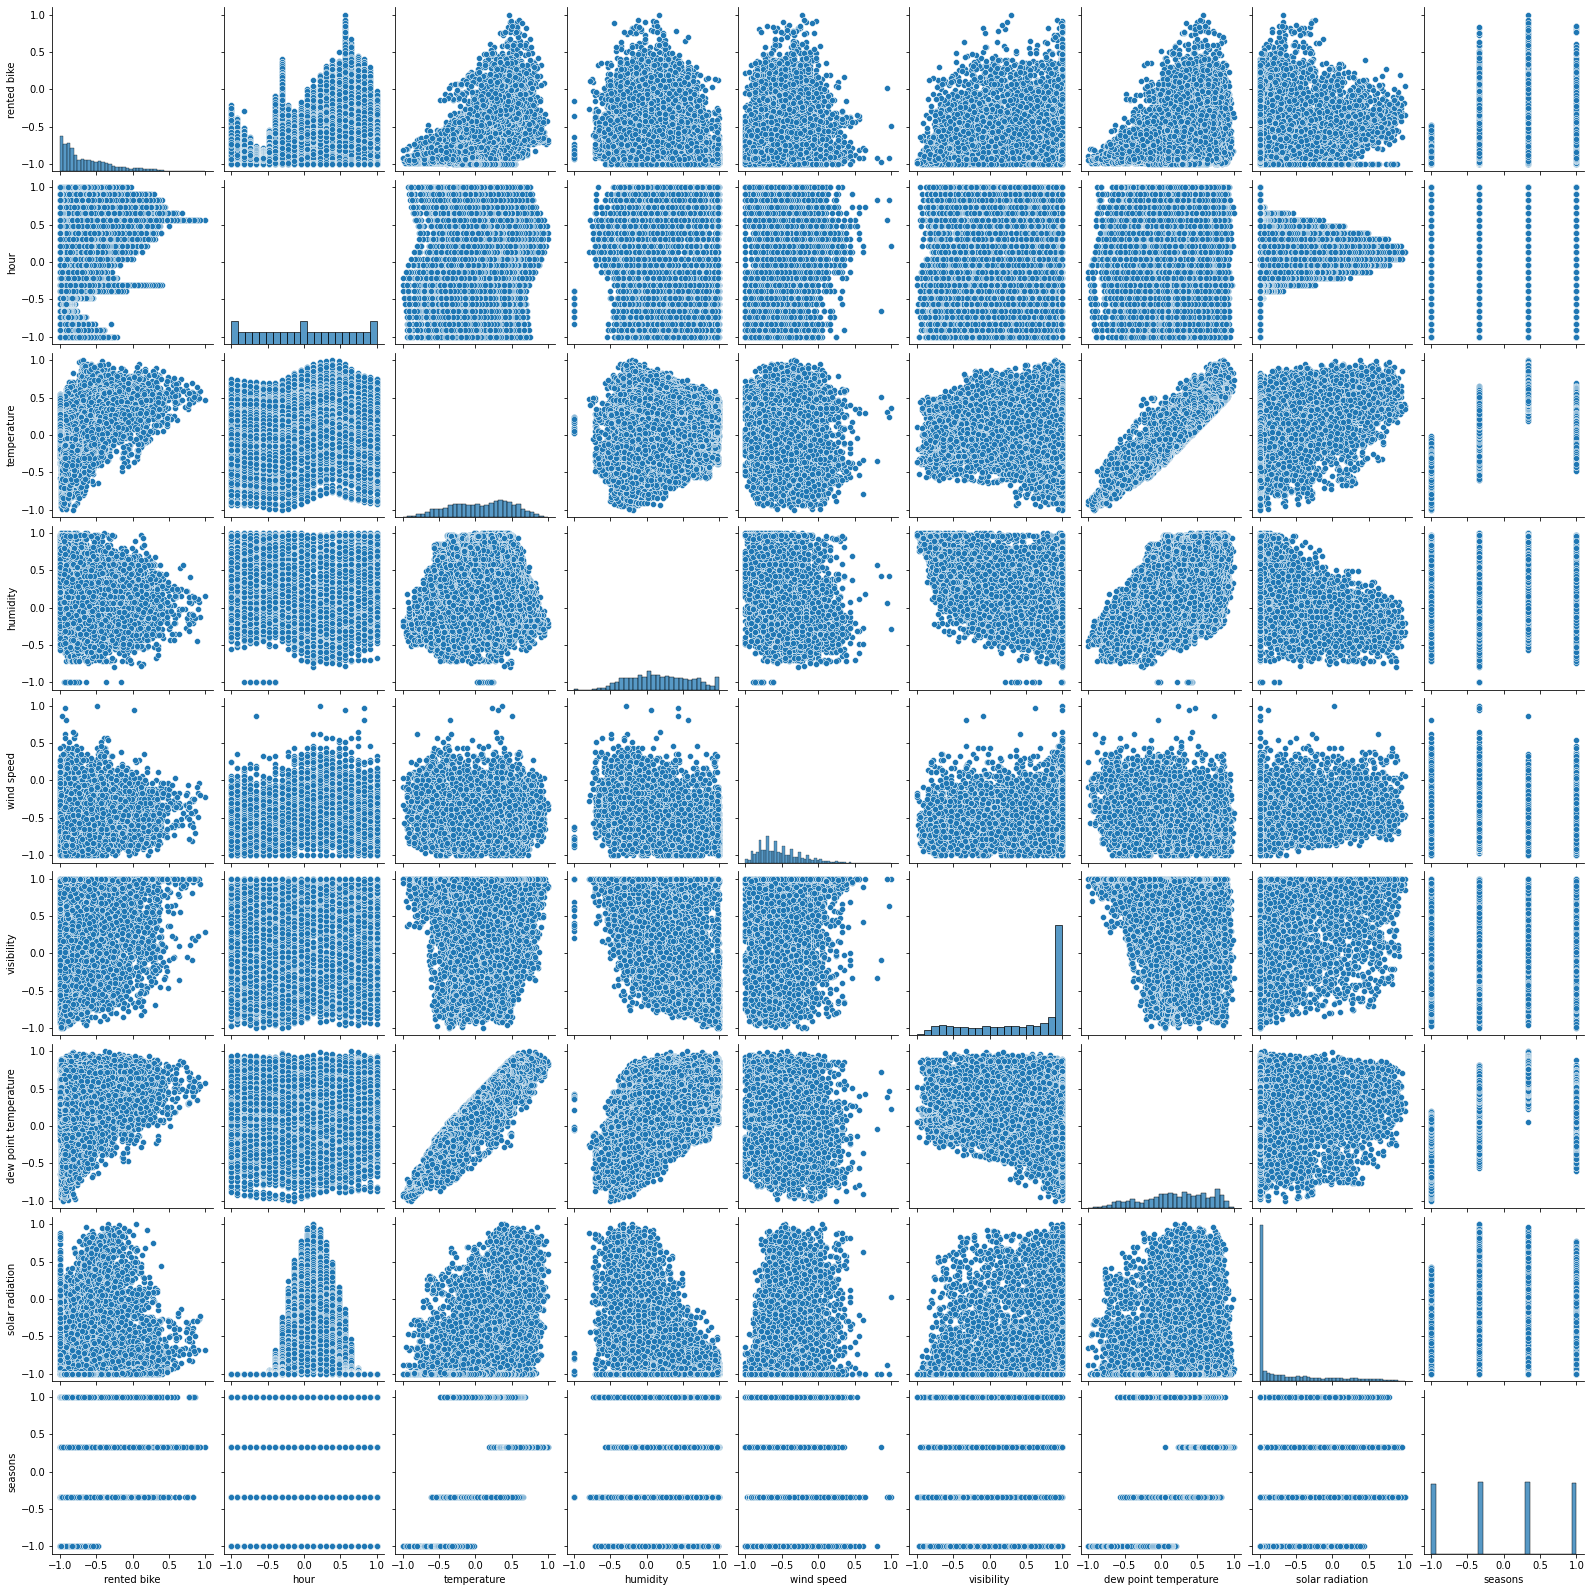

In [ ]:
sn.pairplot(data2)

In [ ]:
corr = data2.corr()
print(corr)

                       rented bike          hour  temperature  humidity  \
rented bike               1.000000  4.102573e-01     0.538558 -0.199780   
hour                      0.410257  1.000000e+00     0.124114 -0.241644   
temperature               0.538558  1.241145e-01     1.000000  0.159371   
humidity                 -0.199780 -2.416438e-01     0.159371  1.000000   
wind speed                0.121108  2.851967e-01    -0.036252 -0.336683   
visibility                0.199280  9.875348e-02     0.034794 -0.543090   
dew point temperature     0.379788  3.054372e-03     0.912798  0.536894   
solar radiation           0.261837  1.451309e-01     0.353505 -0.461919   
seasons                   0.359687  3.514423e-18     0.591545  0.189238   

                       wind speed  visibility  dew point temperature  \
rented bike              0.121108    0.199280               0.379788   
hour                     0.285197    0.098753               0.003054   
temperature             -0.036252

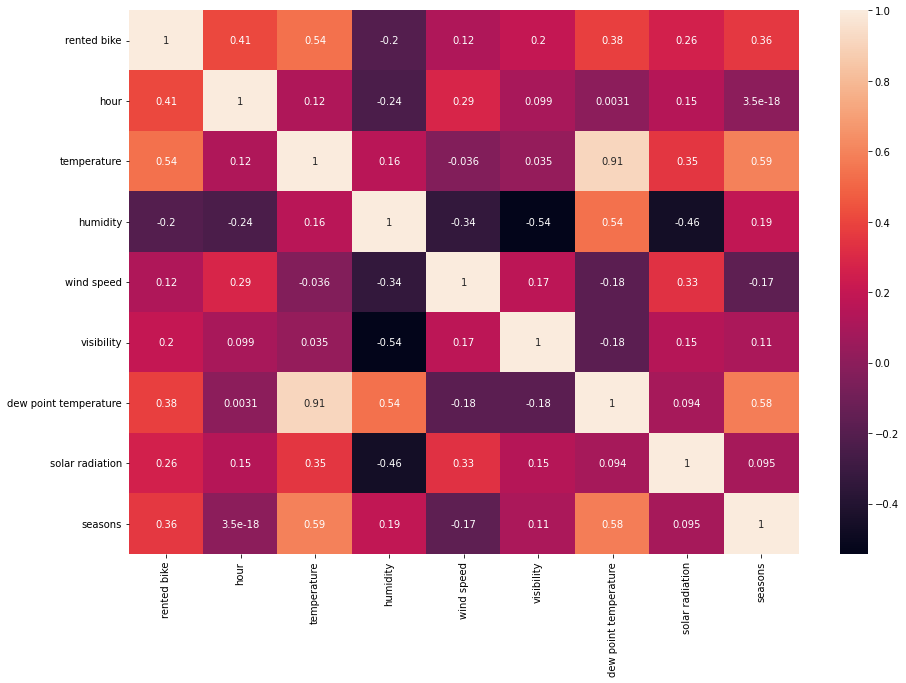

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True)
plt.show()

### SE GENERA EL MODELO

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Con respecto a la generación del modelo, se parte del tener como requerimiento el plantemiento de <b>3 arquitecturas diferentes</b> y <b>3 optimizadores diferentes</b>, para lo cual se parte de un proceso de documentación acerca de los optimizadores de keras, dentro de los cuales se selecciona <b>Adam, Nadam y Adamax</b>, correspondientes a variaciones del Adam. Con los optimizadores definidos se plantean 3 arquitecturas, descritas a continuación, agrupadas como Arquitectura 1, Arquitectura 2 y Arquitectura 3. Posteriormente, se definen los procesos de entrenamiento de la red, permitiendo un analisis final de de las arquitecturas y los optimizadores utilizados.
  </font>
</p>

#### SE IMPORTAN LAS LIBRERIAS

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Se importan las librerias de <b>Tensorflow</b> y <b>Keras</b>, para la creación, entrenamiento y validación del modelo o arquitectura de red neuronal, para lo cual se hace necesario los metodos Sequential con el objetivo de definir el tipo de red, Dense para generar o crear capas densas y plot_model para graficar el modelo.
  </font>
<p>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

#### SE ABSTRAEN LOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Para la abstracción de los datos de entrenamiento y validación se cuenta con 2 procesos fundamentales, el primero corresponde a la separación entre el target, es decir, la salida y las entradas, lo cual se realiza mediante la abstraccion de la columna rented bike como salida y para las entradas se elimina este atributo del data set. El segundo proceso, corresponde a la separación de los datos de entrenamiento y los de validación, lo cual se realiza mediante la función train_test_split de sklearn, en la cual se le indica que los datos de validacón corresponderan al 15% de los datos.
  </font>
<p>

In [ ]:
target = data2['rented bike'].values #y_train
data3 = data2.drop(['rented bike'], axis=1)

print(target.shape)
print(data3.shape)

(8760,)
(8760, 8)


In [ ]:
from sklearn.model_selection import train_test_split
seed = 42

x_train,x_test,y_train,y_test = train_test_split(data3, target, test_size=0.15, random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7446, 8)
(7446,)
(1314, 8)
(1314,)


#### ARQUITECTURA DEL MODELO

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  Para las arquitecturas se presentan <b>3 arquitecturas diferentes</b>, en las cuales se varian tanto el numero de neuronas en las capas como el numero de capas en la red, con el limitante de ser maximo 3 capas profundas. Por ultimo, para cada una de ellas se implementan <b>3 optimizadores diferentes</b>, correspondientes a <b>Adamax</b>, <b>Nadam</b> y <b>Adam</b>
  </font>
</p>

In [ ]:
input_dim = x_train.shape[1]
num_clases = 1

##### ARQUITECTURA 1

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  La primera arquitectura esta conformada por 1 capa de entrada, 1 capas oculta de 10 neuronas, con función de activación ReLU y una capa de salida de una sola neurona con función de activación lineal.
  </font>
</p>

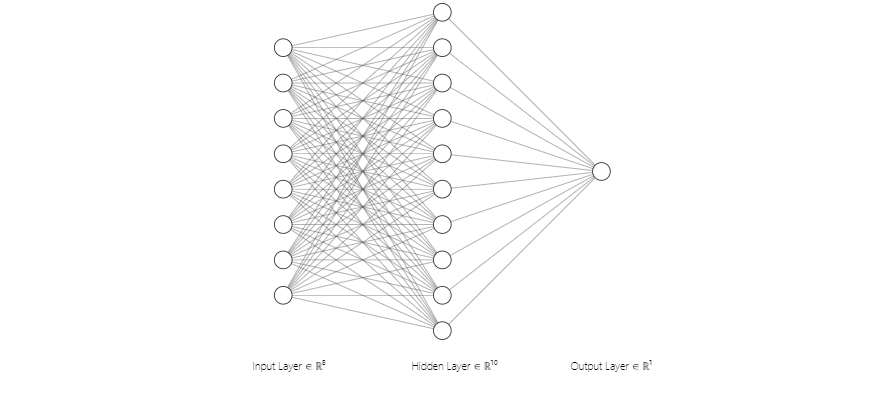

###### Adam

In [ ]:
def model_Adam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA1_Adam = model_Adam()
#plot_model(modelA1_Adam, to_file='model.jpg', show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


###### Nadam

In [ ]:
def model_Nadam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA1_Nadam = model_Nadam()
#plot_model(modelA1_Nadam, to_file='model.jpg', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


###### Adamax

In [ ]:
def model_Adamax():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt =tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA1_Adamax = model_Adamax()
#plot_model(modelA1_Adamax, to_file='model.jpg', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


##### ARQUITECTURA 2

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  La segunda arquitectura esta conformada por 1 capa de entrada, 2 capas ocultas de 10 neuronas, con función de activación ReLU y una capa de salida de una sola neurona con función de activación lineal.
  </font>
</p>

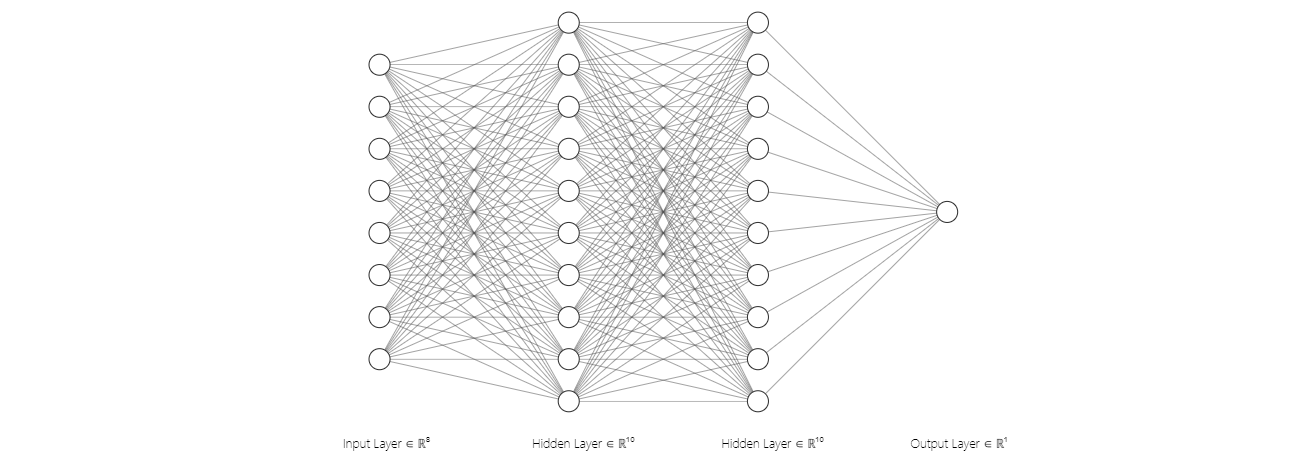

###### Adam

In [ ]:
def model_Adam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA2_Adam = model_Adam()
#plot_model(modelA2_Adam, to_file='model.jpg', show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                90        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


###### Nadam

In [ ]:
def model_Nadam():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA2_Nadam = model_Nadam()
#plot_model(modelA2_Nadam, to_file='model.jpg', show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


###### Adamax

In [ ]:
def model_Adamax():
  model = Sequential()
  model.add(Dense(10, input_dim = input_dim, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt =tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA2_Adamax = model_Adamax()
#plot_model(modelA2_Adamax, to_file='model.jpg', show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


##### ARQUITECTURA 3

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  La tercer arquitectura esta conformada por 1 capa de entrada, 2 capas ocultas de 32 y 16 neuronas respectivamente, con función de activación ReLU y una capa de salidan de una sola neurona con función de activación lineal.
  </font>
</p>

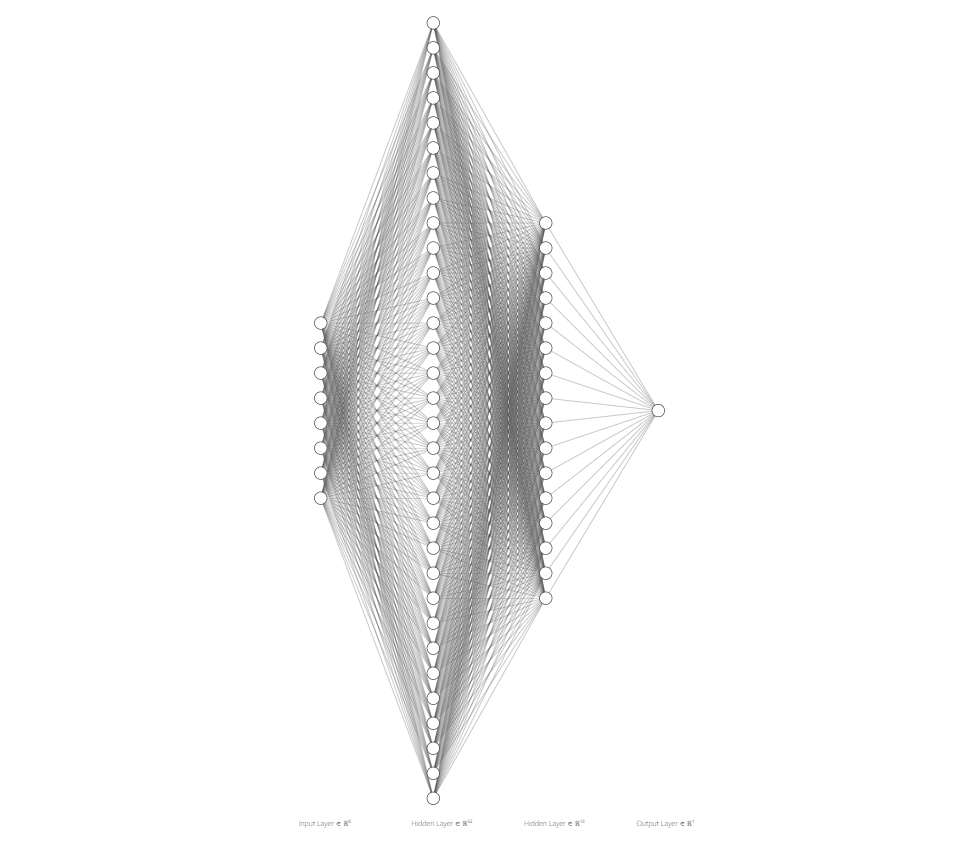

###### Adam

In [ ]:
def model_Adam():
  model = Sequential()
  model.add(Dense(32, input_dim = input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA3_Adam = model_Adam()
#plot_model(modelA1_Adam, to_file='model.jpg', show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                288       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


###### Nadam

In [ ]:
def model_Nadam():
  model = Sequential()
  model.add(Dense(32, input_dim = input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA3_Nadam = model_Nadam()
#plot_model(modelA3_Nadam, to_file='model.jpg', show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 32)                288       
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


###### Adamax

In [ ]:
def model_Adamax():
  model = Sequential()
  model.add(Dense(32, input_dim = input_dim, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt =tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)
 
  model.compile(loss = 'mse', optimizer = opt)

  return model

In [ ]:
modelA3_Adamax = model_Adamax()
#plot_model(modelA3_Adamax, to_file='model.jpg', show_shapes=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                288       
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


#### SE ENTRENAN Y VALIDAN LOS MODELO

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  En esta seccion se entrena cada una de las arquitecturas con cada uno de los optimizadores planteados en la seccion de <b>arquitectura del modelo</b>, realizando una comparación de las predicciones por cada una de las arquitecturas, permitiendo analizar por cada una de las arquitecturas cual es el mejor optimizador, ademas de ello, se hace uso de las funciones de perdida, para observar la evolución y la tendencia del entrenimiento y tambien, se hace uso del coeficciente de regresion, para lograr obtener una metrica entorno a que tan bueno fue el modelo. Para el entrenamiento, de forma general se hace uso de 250 epocas.
  </font>
<p>

##### ARQUITECTURA 1


###### Adam

In [ ]:
history1 = modelA1_Adam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score1 = modelA1_Adam.evaluate(x_test, y_test, verbose=0)

print(score1)

0.06035132706165314


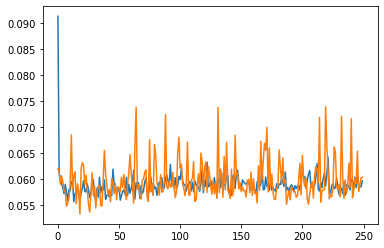

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [ ]:
outputTest_A1_Adam = modelA1_Adam.predict(x_test)
print(outputTest_A1_Adam.shape)

(1314, 1)


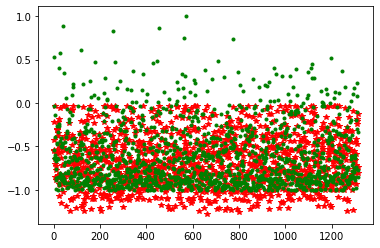

In [ ]:
plt.figure()
plt.plot(outputTest_A1_Adam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A1_Adam_8pred =  modelA1_Adam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A1_Adam_8pred)

[[-0.5412452]]
[[-0.556101]]
[[-0.42501363]]
[[-0.21741125]]
[[-0.698851]]
[[-0.8510962]]
[[-0.03456962]]
[[-0.6491196]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.6354988939502362


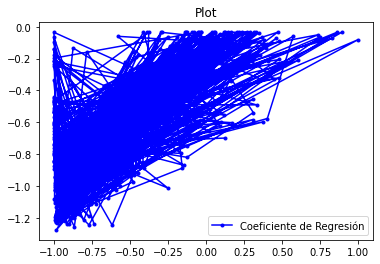

In [ ]:
from sklearn import linear_model

output = outputTest_A1_Adam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Nadam

In [ ]:
history2 = modelA1_Nadam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score2 = modelA1_Nadam.evaluate(x_test, y_test, verbose=0)

print(score2)

0.053454965353012085


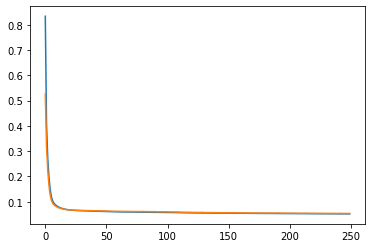

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [ ]:
outputTest_A1_Nadam = modelA1_Nadam.predict(x_test)
print(outputTest_A1_Nadam.shape)

(1314, 1)


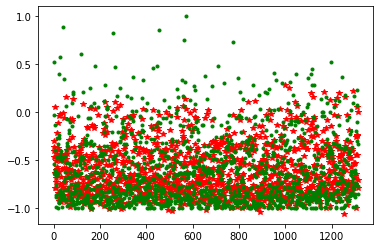

In [ ]:
plt.figure()
plt.plot(outputTest_A1_Nadam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A1_Nadam_8pred =  modelA1_Nadam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A1_Nadam_8pred)

[[-0.46319914]]
[[-0.40030032]]
[[-0.36325067]]
[[-0.29922786]]
[[-0.7921572]]
[[-0.63503003]]
[[0.05618465]]
[[-0.46307456]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.5786713766114066


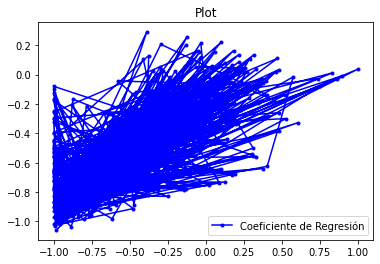

In [ ]:
from sklearn import linear_model

output = outputTest_A1_Nadam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Adamax

In [ ]:
history3 = modelA1_Adamax.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score3 = modelA1_Adamax.evaluate(x_test, y_test, verbose=0)

print(score3)

0.04897253215312958


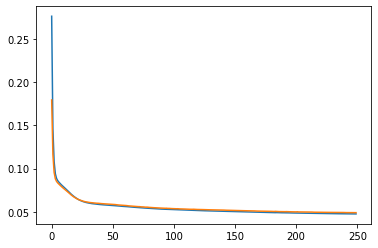

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [ ]:
outputTest_A1_Adamax = modelA1_Adamax.predict(x_test)
print(outputTest_A1_Adamax.shape)

(1314, 1)


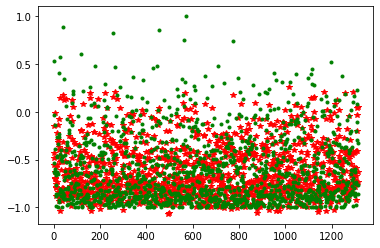

In [ ]:
plt.figure()
plt.plot(outputTest_A1_Adamax, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A1_Adamax_8pred =  modelA1_Adamax.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A1_Adamax_8pred)

[[-0.48476788]]
[[-0.5558582]]
[[-0.4303318]]
[[-0.15234679]]
[[-0.7038094]]
[[-0.6931071]]
[[-0.01200439]]
[[-0.625756]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.6128848164666203


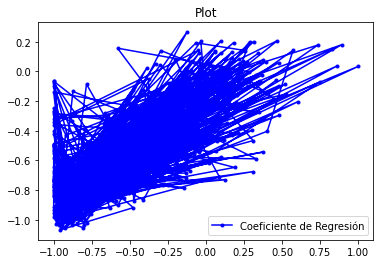

In [ ]:
from sklearn import linear_model

output = outputTest_A1_Adamax
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### COMPARACIÓN

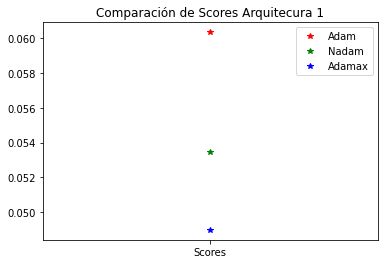

In [ ]:
plt.title('Comparación de Scores Arquitecura 1')
plt.plot("Scores",score1 ,'*r' ,label="Adam")
plt.plot("Scores",score2 ,'*g' ,label="Nadam")
plt.plot("Scores",score3 ,'*b',label="Adamax")
plt.legend()
plt.show()

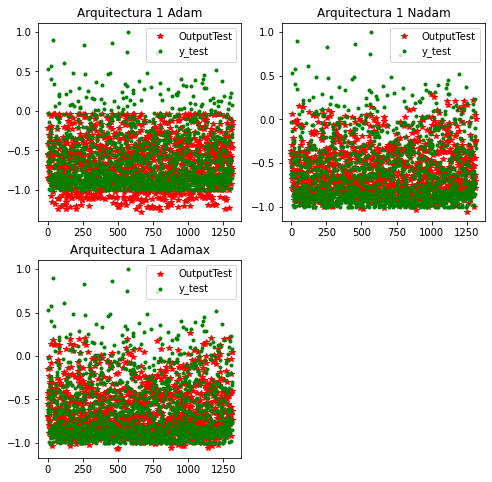

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)

plt.title('Arquitectura 1 Adam')
plt.plot(outputTest_A1_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Arquitectura 1 Nadam')
plt.plot(outputTest_A1_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Arquitectura 1 Adamax')
plt.plot(outputTest_A1_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

##### ARQUITECTURA 2

###### Adam

In [ ]:
history4 = modelA2_Adam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score4 = modelA2_Adam.evaluate(x_test, y_test, verbose=0)

print(score4)

0.05357547849416733


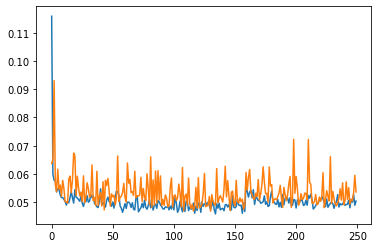

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

In [ ]:
outputTest_A2_Adam = modelA2_Adam.predict(x_test)
print(outputTest_A2_Adam.shape)

(1314, 1)


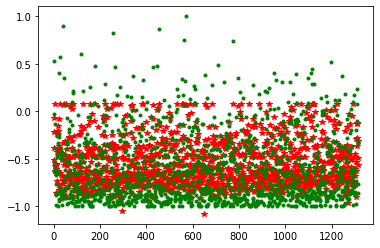

In [ ]:
plt.figure()
plt.plot(outputTest_A2_Adam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A2_Adam_8pred =  modelA2_Adam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A2_Adam_8pred)

[[-0.3908229]]
[[-0.5077114]]
[[-0.21474142]]
[[-0.0652917]]
[[-0.5779759]]
[[-0.56992894]]
[[0.07911617]]
[[-0.6278393]]


**COEFICIENTE DE REGRESION**



(1314, 1)
(1314, 1)
Coeficiente:  0.5440162848098035


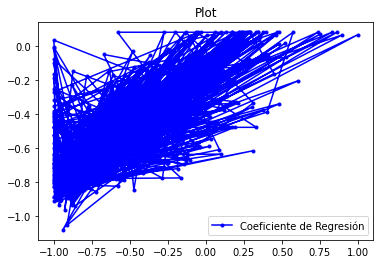

In [ ]:
from sklearn import linear_model

output = outputTest_A2_Adam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Nadam

In [ ]:
history5 = modelA2_Nadam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score5 = modelA2_Nadam.evaluate(x_test, y_test, verbose=0)

print(score5)

0.042755331844091415


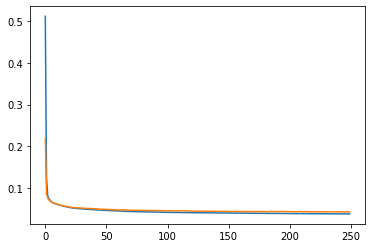

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])

In [ ]:
outputTest_A2_Nadam = modelA2_Nadam.predict(x_test)
print(outputTest_A2_Nadam.shape)

(1314, 1)


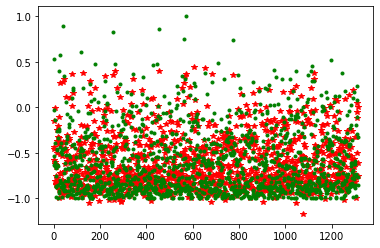

In [ ]:
plt.figure()
plt.plot(outputTest_A2_Nadam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A2_Nadam_8pred =  modelA2_Nadam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A2_Nadam_8pred)

[[-0.45863917]]
[[-0.43259326]]
[[-0.58155465]]
[[-0.15564695]]
[[-0.80878234]]
[[-0.62040865]]
[[-0.01030184]]
[[-0.60350835]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.6906730496079718


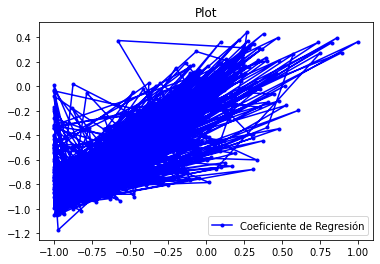

In [ ]:
from sklearn import linear_model

output = outputTest_A2_Nadam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Adamax

In [ ]:
history6 = modelA2_Adamax.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score6 = modelA2_Adamax.evaluate(x_test, y_test, verbose=0)

print(score6)

0.05151710286736488


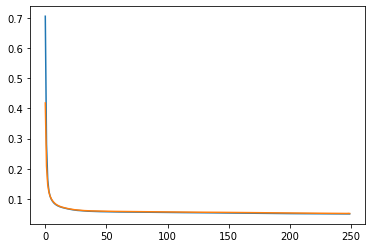

In [ ]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])

In [ ]:
outputTest_A2_Adamax = modelA2_Adamax.predict(x_test)
print(outputTest_A2_Adamax.shape)

(1314, 1)


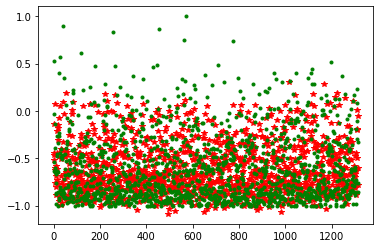

In [ ]:
plt.figure()
plt.plot(outputTest_A2_Adamax, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A2_Adamax_8pred =  modelA2_Adamax.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A2_Adamax_8pred)

[[-0.52299297]]
[[-0.46930474]]
[[-0.44321367]]
[[-0.1396819]]
[[-0.76535386]]
[[-0.6229439]]
[[0.07251865]]
[[-0.6046008]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.5965615483534766


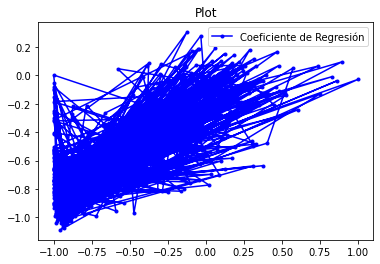

In [ ]:
from sklearn import linear_model

output = outputTest_A2_Adamax
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### COMPARACIÓN

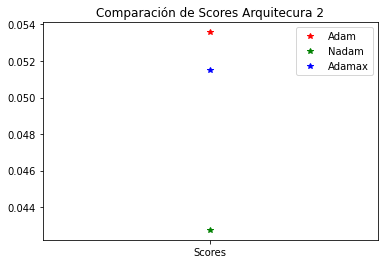

In [ ]:
plt.title('Comparación de Scores Arquitecura 2')
plt.plot("Scores",score4 ,'*r' ,label="Adam")
plt.plot("Scores",score5 ,'*g' ,label="Nadam")
plt.plot("Scores",score6 ,'*b',label="Adamax")
plt.legend()
plt.show()

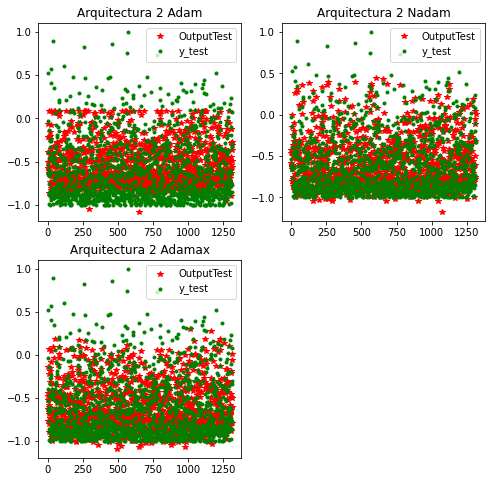

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)

plt.title('Arquitectura 2 Adam')
plt.plot(outputTest_A2_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Arquitectura 2 Nadam')
plt.plot(outputTest_A2_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Arquitectura 2 Adamax')
plt.plot(outputTest_A2_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

##### ARQUITECTURA 3

###### Adam

In [ ]:
history7 = modelA3_Adam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score7 = modelA3_Adam.evaluate(x_test, y_test, verbose=0)

print(score7)

0.04821036010980606


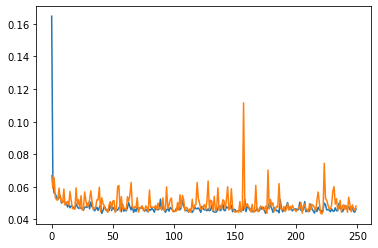

In [ ]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])

In [ ]:
outputTest_A3_Adam = modelA3_Adam.predict(x_test)
print(outputTest_A3_Adam.shape)

(1314, 1)


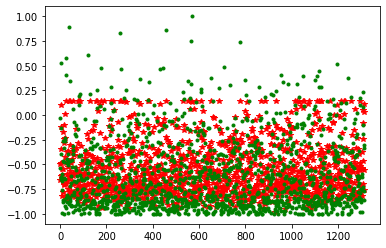

In [ ]:
plt.figure()
plt.plot(outputTest_A3_Adam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A3_Adam_8pred =  modelA3_Adam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A3_Adam_8pred)

[[-0.49056607]]
[[-0.6551682]]
[[-0.34052938]]
[[-0.12478644]]
[[-0.61258566]]
[[-0.4824828]]
[[0.1061276]]
[[-0.61101824]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.604672173737334


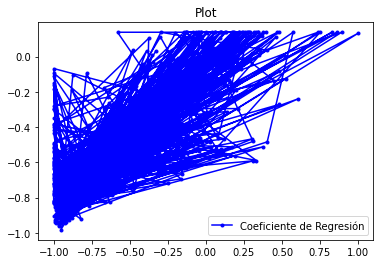

In [ ]:
from sklearn import linear_model

output = outputTest_A3_Adam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Nadam

In [ ]:
history8 = modelA3_Nadam.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score8 = modelA3_Nadam.evaluate(x_test, y_test, verbose=0)

print(score8)

0.03559891879558563


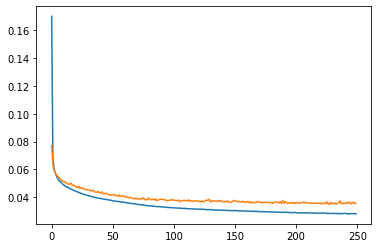

In [ ]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])

In [ ]:
outputTest_A3_Nadam = modelA3_Nadam.predict(x_test)
print(outputTest_A3_Nadam.shape)

(1314, 1)


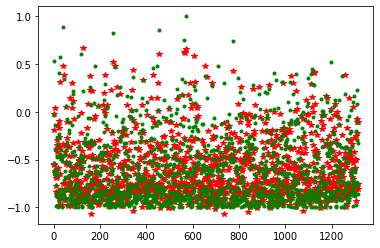

In [ ]:
plt.figure()
plt.plot(outputTest_A3_Nadam, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A3_Nadam_8pred =  modelA3_Nadam.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A3_Nadam_8pred)

[[-0.19518304]]
[[-0.54926026]]
[[-0.56057036]]
[[-0.02286825]]
[[-0.63650155]]
[[-0.62369955]]
[[0.04439151]]
[[-0.63618875]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.7691550561402417


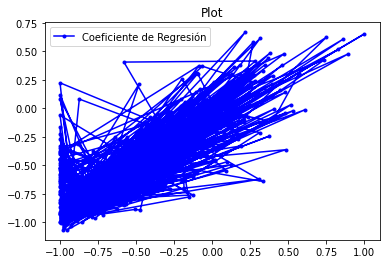

In [ ]:
from sklearn import linear_model

output = outputTest_A3_Nadam
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### Adamax

In [ ]:
history9 = modelA3_Adamax.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=250, batch_size=100, verbose=0)

In [ ]:
score9 = modelA3_Adamax.evaluate(x_test, y_test, verbose=0)

print(score9)

0.037764303386211395


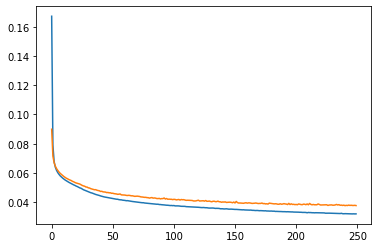

In [ ]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])

In [ ]:
outputTest_A3_Adamax = modelA3_Adamax.predict(x_test)
print(outputTest_A3_Adamax.shape)

(1314, 1)


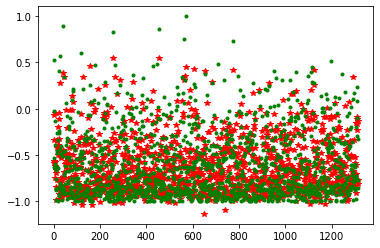

In [ ]:
plt.figure()
plt.plot(outputTest_A3_Adamax, '*r',y_test, '.g')

In [ ]:
for i in range(0,8) :
  outputTest_A3_Adamax_8pred =  modelA3_Adamax.predict(np.reshape(np.array(x_test)[i],(1,8)))  
  print(outputTest_A3_Adamax_8pred)

[[-0.34193128]]
[[-0.58576375]]
[[-0.55997753]]
[[-0.0715495]]
[[-0.7485133]]
[[-0.6172894]]
[[-0.04894124]]
[[-0.574349]]


**COEFICIENTE DE REGRESION**

(1314, 1)
(1314, 1)
Coeficiente:  0.7069750765871351


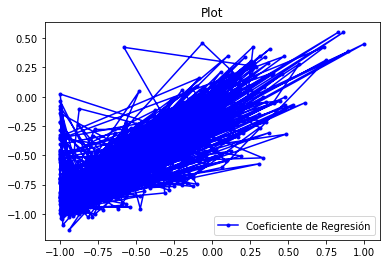

In [ ]:
from sklearn import linear_model

output = outputTest_A3_Adamax
target = y_test.reshape([1314,1])

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(target,output, '.-b', label = 'Coeficiente de Regresión')
plt.title('Plot')
plt.legend()
plt.show()

###### COMPARACIÓN

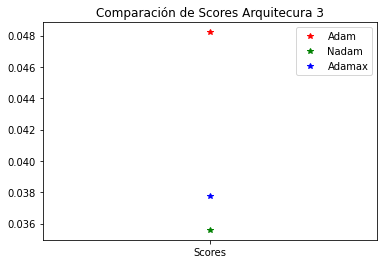

In [ ]:
plt.title('Comparación de Scores Arquitecura 3')
plt.plot("Scores",score7 ,'*r' ,label="Adam")
plt.plot("Scores",score8 ,'*g' ,label="Nadam")
plt.plot("Scores",score9 ,'*b',label="Adamax")
plt.legend()
plt.show()

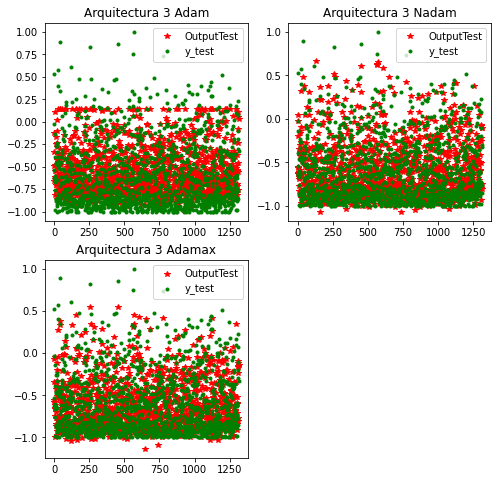

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)

plt.title('Arquitectura 3 Adam')
plt.plot(outputTest_A3_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Arquitectura 3 Nadam')
plt.plot(outputTest_A3_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Arquitectura 3 Adamax')
plt.plot(outputTest_A3_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

##### COMPARACIONES ENTRE ARQUITECTURAS Y OPTIMIZADORES

<p align="justify">
  <font face="Arial Narrow" size="4" color="#3c3c3c"> 
  A continuación se presenta una comparación entre las diferentes arquitecturas y optimizadores, mediante las respuestas de las predicciones y el resultado de las funciones de perdida del entrenamiento y de la validación. Con respecto a estas comparaciones es posible observar como de forma generalizada el optimizador <b>Nadam</b> presenta mejores resultados sin importar la arquitectura, guardando claramente la proporcion entre unas arquitecturas mejores que otras. Por otro lado, si se observan las respuestas de las predicciones se puede observar como las arquitecturas con optimizadores adam, presentan un comportamiento rigido en el cual las predicciones estan en un bloque, generando una especie de linea horizontal, a diferencia de los optimizadores Adamax y Nadam, en los cuales se puede observar como los valores predichos presentan un comportamiento similar al de los datos reales. Por otra parte, la arquitectura que presenta mejores resultados corresponde a la arquitectura 3, debido a que presenta funciones de perdida mucho mas cercanas a cero, ademas, si se observan los coeficientes de regresion mencionados anteriormente se tiene que la respuesta que presenta mayor cercania a uno, con un 70% es la del Nadam para la arquitectura 3
  </font>
<p>

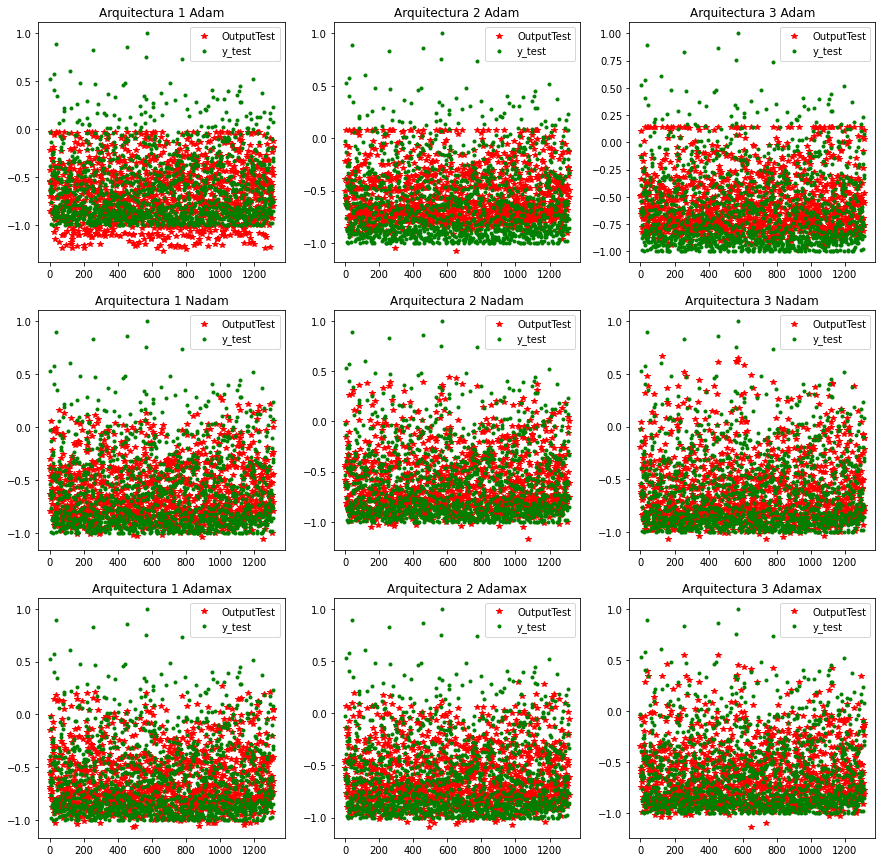

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.title('Arquitectura 1 Adam')
plt.plot(outputTest_A1_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 2)
plt.title('Arquitectura 2 Adam')
plt.plot(outputTest_A2_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 3)
plt.title('Arquitectura 3 Adam')
plt.plot(outputTest_A3_Adam ,'*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 4)
plt.title('Arquitectura 1 Nadam')
plt.plot(outputTest_A1_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 5)
plt.title('Arquitectura 2 Nadam')
plt.plot(outputTest_A2_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 6)
plt.title('Arquitectura 3 Nadam')
plt.plot(outputTest_A3_Nadam, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 7)
plt.title('Arquitectura 1 Adamax')
plt.plot(outputTest_A1_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 8)
plt.title('Arquitectura 2 Adamax')
plt.plot(outputTest_A2_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()

plt.subplot(3, 3, 9)
plt.title('Arquitectura 3 Adamax')
plt.plot(outputTest_A3_Adamax, '*r' ,label='OutputTest')
plt.plot(y_test, '.g' ,label='y_test')
plt.legend()






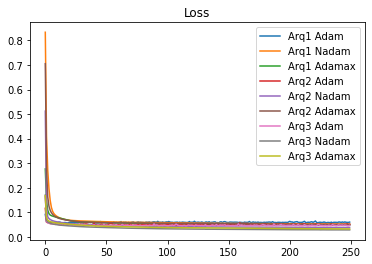

In [ ]:
plt.title('Loss')
plt.plot(history1.history['loss'], label="Arq1 Adam")
plt.plot(history2.history['loss'], label="Arq1 Nadam")
plt.plot(history3.history['loss'], label="Arq1 Adamax")
plt.plot(history4.history['loss'], label="Arq2 Adam")
plt.plot(history5.history['loss'], label="Arq2 Nadam")
plt.plot(history6.history['loss'], label="Arq2 Adamax")
plt.plot(history7.history['loss'], label="Arq3 Adam")
plt.plot(history8.history['loss'], label="Arq3 Nadam")
plt.plot(history9.history['loss'], label="Arq3 Adamax")
plt.legend()

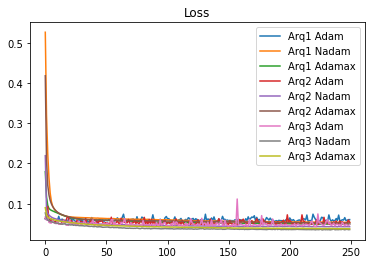

In [ ]:
plt.title('Loss')
plt.plot(history1.history['val_loss'], label="Arq1 Adam")
plt.plot(history2.history['val_loss'], label="Arq1 Nadam")
plt.plot(history3.history['val_loss'], label="Arq1 Adamax")
plt.plot(history4.history['val_loss'], label="Arq2 Adam")
plt.plot(history5.history['val_loss'], label="Arq2 Nadam")
plt.plot(history6.history['val_loss'], label="Arq2 Adamax")
plt.plot(history7.history['val_loss'], label="Arq3 Adam")
plt.plot(history8.history['val_loss'], label="Arq3 Nadam")
plt.plot(history9.history['val_loss'], label="Arq3 Adamax")
plt.legend()

#### SALVAR EL MODELO

Se salva el modelo entrenado, sin embargo, no se realiza con el modelo de mejores resultados(Arquitectura 3) esto, debido a que si se espera realizar una implementación en Arduino, se cuenta con capacidades minimas para el computo de las matrices. 

In [ ]:
weigths_and_bias_A1_Nadam = modelA1_Nadam.get_weights()
print(np.array(weigths_and_bias_A1_Nadam).shape)
print(weigths_and_bias_A1_Nadam)

(4,)
[array([[ 6.8647270e-05,  5.6620789e-01, -1.0353112e-01, -4.9398108e-03,
        -2.8814337e-01, -3.6311933e-01,  5.0457025e-01,  1.6162302e-01,
        -1.6705030e-01, -4.4064024e-01],
       [-1.3720945e+00,  5.0238663e-01, -4.2780468e-01, -4.7172624e-01,
        -1.4869051e-01, -1.1599174e+00, -2.0985128e-01,  2.3086137e-01,
        -3.0139875e-01, -3.6237752e-01],
       [ 4.9748176e-01, -7.4036109e-01,  3.1550148e-01, -1.0887721e-01,
        -3.9423314e-01,  2.2722551e-01, -4.8565936e-01,  3.0849808e-01,
        -1.1266586e+00,  1.9358855e-01],
       [-1.9836724e-01,  2.9759112e-01,  3.4774268e-01, -2.9813299e-01,
         5.5221564e-01, -1.2367419e-01, -3.8402212e-01, -3.2091805e-01,
        -5.1539767e-01, -1.1888021e-01],
       [ 4.7617614e-02,  6.4913101e-02,  1.2590386e-02,  3.6151993e-01,
        -4.6224520e-01, -5.8868214e-02,  2.4121650e-02, -3.2921389e-02,
         2.6786050e-01,  1.4336103e-01],
       [-5.8109200e-01,  4.4995901e-01, -6.4925835e-02, -1.6322175e-0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
